### Exercise
At the same level as this notebook on github, there is an Exercise folder that contains carprices.csv. This file has car sell prices for 3 different models. First plot data points on a scatter plot chart to see if linear regression model can be applied. If yes, then build a model that can answer following questions,

1) Predict price of a mercedez benz that is 4 yr old with mileage 45000

2) Predict price of a BMW X5 that is 7 yr old with mileage 86000

3) Tell me the score (accuracy) of your model. (Hint: use LinearRegression().score())

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv("Datasets/carprices.csv")
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


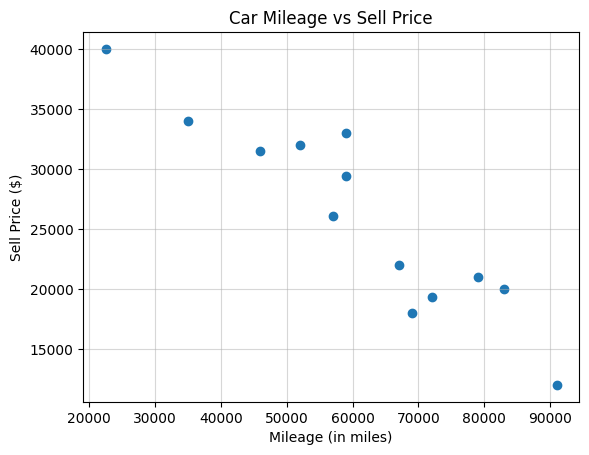

In [3]:
plt.title("Car Mileage vs Sell Price")
plt.xlabel("Mileage (in miles)")
plt.ylabel("Sell Price ($)")
plt.scatter(df['Mileage'],df['Sell Price($)'])
plt.grid(True, alpha=0.5)
plt.show()

In [4]:
dummies=pd.get_dummies(df['Car Model'])
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,False,True,False
1,False,True,False
2,False,True,False
3,False,True,False
4,False,True,False
5,True,False,False
6,True,False,False
7,True,False,False
8,True,False,False
9,False,False,True


In [5]:
merged=pd.concat([df,dummies],axis='columns')
merged

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,False,True,False
1,BMW X5,35000,34000,3,False,True,False
2,BMW X5,57000,26100,5,False,True,False
3,BMW X5,22500,40000,2,False,True,False
4,BMW X5,46000,31500,4,False,True,False
5,Audi A5,59000,29400,5,True,False,False
6,Audi A5,52000,32000,5,True,False,False
7,Audi A5,72000,19300,6,True,False,False
8,Audi A5,91000,12000,8,True,False,False
9,Mercedez Benz C class,67000,22000,6,False,False,True


In [6]:
final=merged.drop(['Car Model'],axis='columns')
final

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,69000,18000,6,False,True,False
1,35000,34000,3,False,True,False
2,57000,26100,5,False,True,False
3,22500,40000,2,False,True,False
4,46000,31500,4,False,True,False
5,59000,29400,5,True,False,False
6,52000,32000,5,True,False,False
7,72000,19300,6,True,False,False
8,91000,12000,8,True,False,False
9,67000,22000,6,False,False,True


In [7]:
X=final.drop(['Sell Price($)'],axis='columns')
X

,Mileage,Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,69000,6,False,True,False
1,35000,3,False,True,False
2,57000,5,False,True,False
3,22500,2,False,True,False
4,46000,4,False,True,False
5,59000,5,True,False,False
6,52000,5,True,False,False
7,72000,6,True,False,False
8,91000,8,True,False,False
9,67000,6,False,False,True


In [8]:
y=final['Sell Price($)']
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [9]:
model=LinearRegression()
model.fit(X,y)

LinearRegression()

In [10]:
model.score(X,y)

0.9417050937281082

In [11]:
model.predict([[45000,4,0,0,1]])

/Users/sudiptoray/Developer/LearnML/ML_venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([36991.31721061])

In [12]:
model.predict(pd.DataFrame([[45000,4,0,0,1]],columns=X.columns))

array([36991.31721061])

In [13]:
model.predict(pd.DataFrame([[86000,7,0,1,0]],columns=X.columns))

array([11080.74313219])

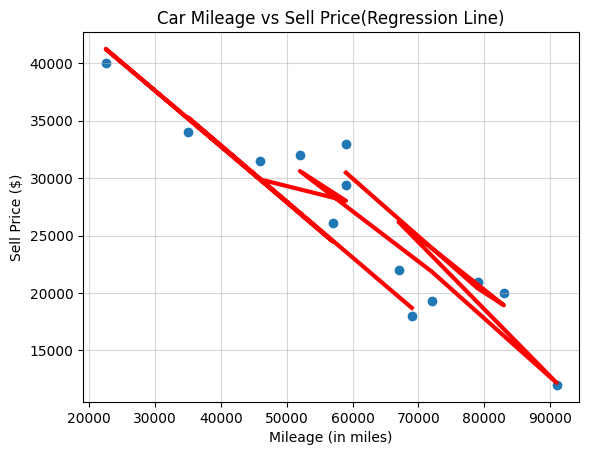

In [14]:
plt.title("Car Mileage vs Sell Price(Regression Line)")
plt.xlabel("Mileage (in miles)")
plt.ylabel("Sell Price ($)")
plt.scatter(df['Mileage'],df['Sell Price($)'])
plt.plot(df['Mileage'],model.predict(X),color='red',linewidth=3)
plt.grid(True, alpha=0.5)
plt.show()